In [ ]:
import os
import sys
import spectral
import numpy as np

notebook_path=os.getcwd()
project_root=os.path.dirname(notebook_path)
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"O caminho '{project_root}' foi adicionado ao sys.path.")
try:
    from src.rois import selecionar_rois, plotar_comparacao_roi, plotar_media_espectral
    print("\nOK Código")
except ImportError as e:
    print(f"\nErro: {e}")
print("OK Bibliotecas")


OK Código
OK Bibliotecas


In [ ]:
arquivo_hdr='../data/bronze level/hsi_original/351_1_240506-160920/capture/351_1_240506-160920.hdr'
hdr_path_completo=os.path.join(arquivo_hdr)
try:
    img=spectral.open_image(hdr_path_completo).load()
    print(f"Imagem carregada de: {hdr_path_completo}")
except FileNotFoundError:
    print(f"Arquivo não encontrado")

Imagem carregada de: ../data/bronze level/hsi_original/351_1_240506-160920/capture/351_1_240506-160920.hdr


In [ ]:
remover_bandas = 15
img_cortada = img[:, :, remover_bandas:-remover_bandas]
wave_cortada = img.bands.centers[remover_bandas:-remover_bandas]

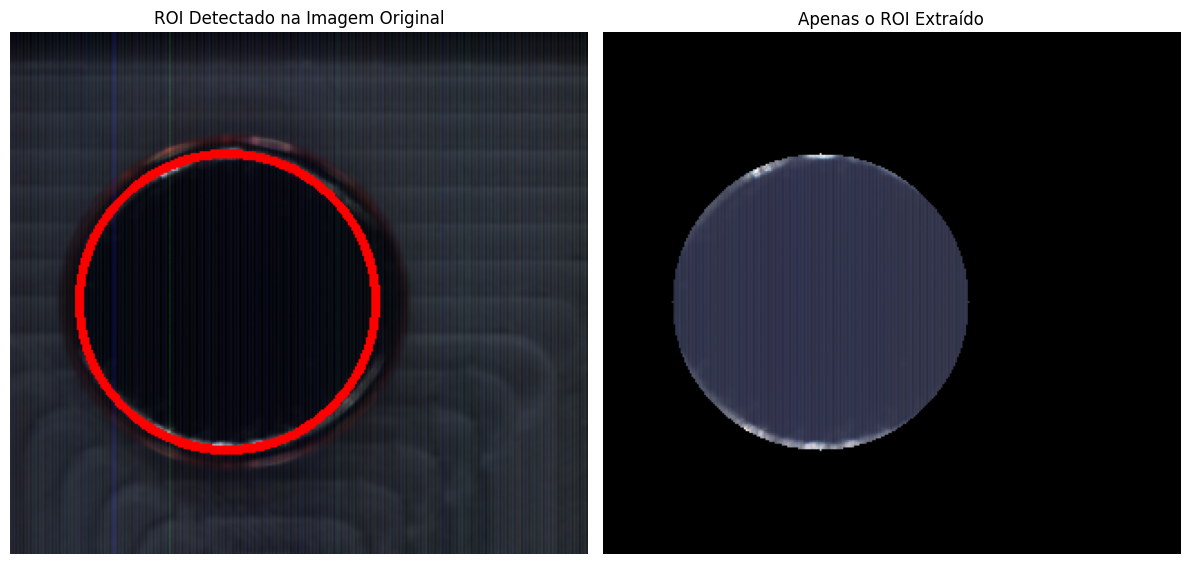

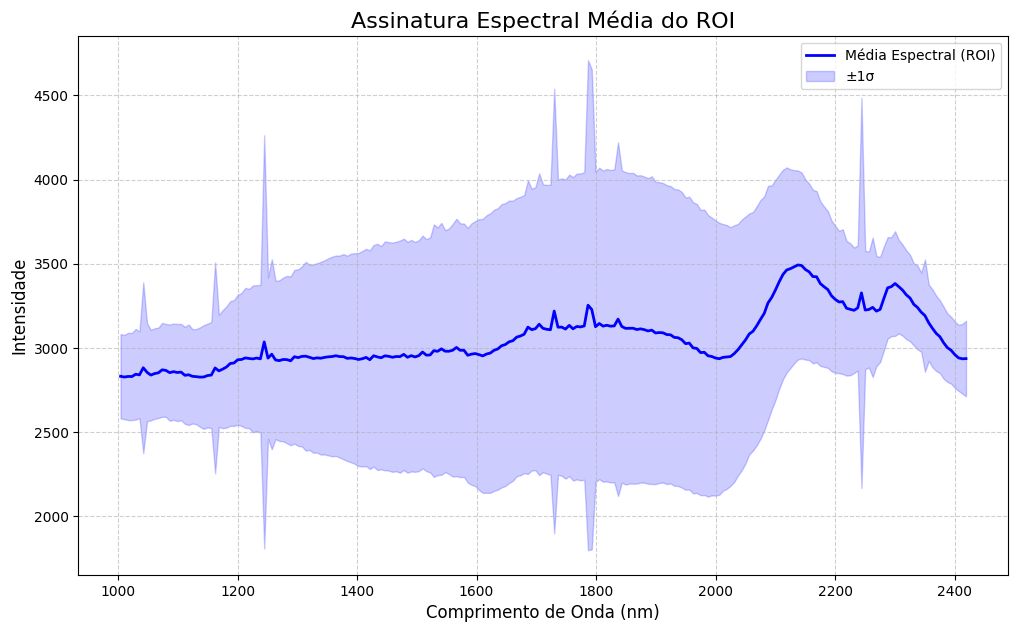

In [ ]:
rois, img_rgb, circulo = selecionar_rois(img_cortada)
plotar_comparacao_roi(rois, img_rgb, circulo)

plotar_media_espectral(rois, wave_cortada)

In [ ]:
mask_2d = rois[:, :, 0]>0
pixels_rois2D = rois[mask_2d]
print(f"Shape do cubo 3D do ROI: {rois.shape}")
print(f"Número de pixels extraídos do ROI: {pixels_rois2D.shape[0]}")
print(f"Número de bandas (cortadas): {pixels_rois2D.shape[1]}")

Shape do cubo 3D do ROI: (289, 320, 226)
Número de pixels extraídos do ROI: 21101
Número de bandas (cortadas): 226


In [ ]:

silver_path = os.path.join(project_root, 'data', 'silver level', 'rois_extraidos')
os.makedirs(silver_path, exist_ok=True)

path_pixels_roi = os.path.join(silver_path, 'pixels_roi_cortados.npy')
path_wavelengths = os.path.join(silver_path, 'wavelengths_cortados.npy')

np.save(path_pixels_roi, pixels_rois2D)
np.save(path_wavelengths, wave_cortada)

print(f"Pixels do ROI salvos em: {path_pixels_roi}")
print(f"Comprimentos de onda salvos em: {path_wavelengths}")

Pixels do ROI salvos em: c:\Users\ao435\OneDrive\Documentos\IC PUCGO\Codigo\ETL-Medalhao\data\silver level\rois_extraidos\pixels_roi_cortados.npy
Comprimentos de onda salvos em: c:\Users\ao435\OneDrive\Documentos\IC PUCGO\Codigo\ETL-Medalhao\data\silver level\rois_extraidos\wavelengths_cortados.npy
